# **TikTok Claims Classification Project: Regression Modelling**

<img src="..\Images\Bubble logo.png" alt="Logo" style="float:left; width:120px; height:120px;">

## **Introduction**

The data team is developing a machine learning model to classify videos as either containing a claim or offering an opinion. This predictive model aims to help TikTok streamline the handling of user reports, reducing backlog and improving prioritization efficiency.

Progress on the project is well underway, with the team having completed an action plan, initial Python coding, exploratory data analysis (EDA), and hypothesis testing. Following a review of the hypothesis testing results, TikTok’s Operations Lead, Maika Abadi, expressed interest in understanding how various factors are associated with user verification status. Initial observations suggest that verified users are more likely to post opinion-based videos.

To gain deeper insights, the data team has decided to investigate the predictors of verification status. I have been tasked with conducting a logistic regression analysis using verified status as the outcome variable. The findings from this analysis may provide valuable context for the final model to distinguish between claims and opinions in video content.

## **Contents**

#### **Plan**
1. Environment and Version Verification
2. Import Libraries and Packages
3. Import Dataset

#### **Analyze**
4. Data Validation
5. Data Cleaning
6. Confirm Data Team's Observations
7. Begin Model Assessment and Preparation
8. Feature Engineering
9. Examine Correlations

#### **Construct**
10. Variable Selection
11. Train-Test Split
12. Encode Variables
13. Encode Outcome Variable
14. Model Building

#### **Execute**
15. Results and Evaluation
16. Visualize Model Results
17. Interpret Model Coefficients

#### **Conclusion**

<br>

# **Plan Phase:**

## **1. Environment and Version Verification**

**Ensure** compatibility and track the software versions used for this analysis to support reproducibility and troubleshooting.

In [1]:
import platform
import statsmodels
import pandas as pd
import numpy as np
print('Python Version: ', platform.python_version())
print('Numpy Version: ', np.__version__)
print('Pandas Version: ', pd.__version__)
print('Statsmodels Version: ', statsmodels.__version__)

Python Version:  3.12.4
Numpy Version:  2.0.1
Pandas Version:  2.2.2
Statsmodels Version:  0.14.2


<br>

## **2. Import Libraries and Packages**

**Import** necessary libraries for data manipulation, visualization, and modelling.

In [2]:
# Import packages for data manipulation
import pandas as pd
import numpy as np

# Import packages for data visualization
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

# Import packages for data preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.utils import resample

# Import packages for data modeling
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

# Import packages for model evaluation and metrics
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor

<br>

## **3. Import Dataset**

**Load** the dataset into a DataFrame for exploration and analysis.

In [3]:
# Load dataset into dataframe
df = pd.read_csv(r'C:\Users\danet\Documents\tiktok_dataset.csv')

<br>

# **Analyse Phase:** 

## **4. Data Validation**

**Inspect** first few rows

In [4]:
# Display first few rows
df.head(3)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0


<br>

**View** basic information about the data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


<br>

**Generate** descriptive statistics

In [6]:
df.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


<br>

## **5. Data Cleaning**

**Ensure** data quality by addressing missing values, duplicates, and outliers.

#### **Handling Missing Values** 

As established in the previous EDA, there are missing values across the same 7 columns in 298 rows. Since dropping these rows only reduces the dataset by 1.54%, which is a minimal loss, I will proceed to drop them now to maintain the integrity of the analysis.

In [7]:
# Check for missing values
missing = df.isnull().sum()
proportion = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Count' : missing,
    'Proportion' : proportion.round(2).astype(str) + '%'
})
missing_df

,Count,Proportion
#,0,0.0%
claim_status,298,1.54%
video_id,0,0.0%
video_duration_sec,0,0.0%
video_transcription_text,298,1.54%
verified_status,0,0.0%
author_ban_status,0,0.0%
video_view_count,298,1.54%
video_like_count,298,1.54%
video_share_count,298,1.54%


In [8]:
# Drop rows with missing values
df_cleaned = df.dropna().reset_index(drop=True)

In [9]:
# Confirm changes after handling missing values
print(df_cleaned.isnull().sum())

#                           0
claim_status                0
video_id                    0
video_duration_sec          0
video_transcription_text    0
verified_status             0
author_ban_status           0
video_view_count            0
video_like_count            0
video_share_count           0
video_download_count        0
video_comment_count         0
dtype: int64


<br>

#### **Check for and Handle Duplicates**

In [10]:
# Check for duplicates
df_cleaned.duplicated().sum()

np.int64(0)

***Note:*** Zero duplicates observed.  No action required.

<br>

#### **Handling Outliers**

**Construct** a dataframe displaying the number of outliers and their proportions.

In [11]:
# Select columns to be assessed
column_list = ['video_duration_sec', 'video_view_count', 'video_like_count',
               'video_share_count', 'video_download_count', 'video_comment_count']

# Define function (EDA established outliers > than upper limit and not below lower limit)
def calculate_outliers(df_cleaned, column_list):
    results = []

    for column in column_list:
        q1 = df_cleaned[column].quantile(0.25)
        q3 = df_cleaned[column].quantile(0.75)
        iqr = q3 - q1

        # Calculate thresholds
        lower_threshold = q1 - 1.5 * iqr
        upper_threshold = q3 + 1.5 * iqr

        # Count outliers above and below thresholds
        upper_outliers = (df_cleaned[column] > upper_threshold).sum()
        lower_outliers = (df_cleaned[column] < lower_threshold).sum()

        # Total outliers and proportion
        total_outliers = upper_outliers + lower_outliers
        proportion = (total_outliers / len(df_cleaned)) * 100

        # Total count of the column
        total_count = df_cleaned[column].sum()

        results.append([
            column,
            total_count,
            upper_outliers,
            lower_outliers,
            total_outliers,
            f"{proportion:.2f}%"
        ])

    # Create a DataFrame to display the results
    outlier_df = pd.DataFrame(results, columns=[
        'Column',
        'Total Counts',
        'Upper Outliers',
        'Lower Outliers',
        'Total Outliers',
        'Proportion'
    ])

    return outlier_df

# Call the function and assign the result to `outlier_df`
outlier_df = calculate_outliers(df_cleaned, column_list)
outlier_df

,Column,Total Counts,Upper Outliers,Lower Outliers,Total Outliers,Proportion
0,video_duration_sec,6.187760e+05,0,0,0,0.00%
1,video_view_count,4.860858e+09,0,0,0,0.00%
2,video_like_count,1.608870e+09,1726,0,1726,9.04%
3,video_share_count,3.193755e+08,2508,0,2508,13.14%
4,video_download_count,2.002732e+07,2450,0,2450,12.84%
5,video_comment_count,6.666273e+06,2789,0,2789,14.61%


<br>

**Visualize** outliers using boxplots and selectively cap `'video_like_count'` and `'video_comment_count'` outliers using the IQR Based Upper Limit.  Reasons for this will be explained down below.

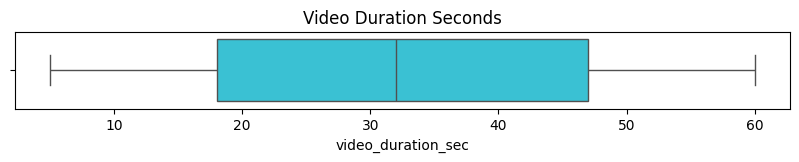

In [12]:
# Boxplot to visualize distribution of `video_duration_sec`
plt.figure(figsize=(10, 1))
sns.boxplot(x=df_cleaned['video_duration_sec'], color="#20D5EC")
plt.title('Video Duration Seconds');

***Note:*** Zero outliers detected.

<br>

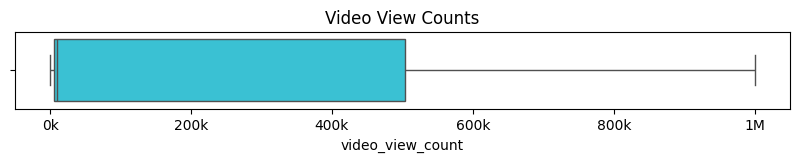

In [13]:
# Boxplot to visualize distribution of `video_view_count`
plt.figure(figsize=(10, 1))
sns.boxplot(x=df_cleaned['video_view_count'], color="#20D5EC")

plt.xticks(ticks=range(0, 1000001, 200000), 
           labels=[f'{x//1000000}M' if x >= 1000000 else f'{x//1000}k' for x in range(0, 1000001, 200000)])

plt.title('Video View Counts');

***Note:*** Zero outliers detected.

<br>

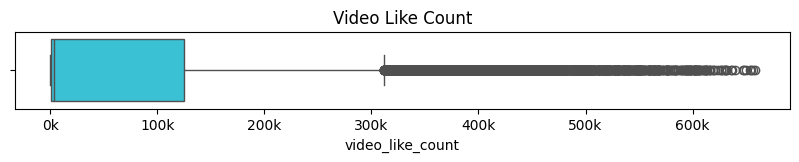

In [14]:
# Boxplot to visualize distribution of `video_like_count`
plt.figure(figsize=(10, 1))
sns.boxplot(x=df_cleaned['video_like_count'], color="#20D5EC")
plt.xticks(ticks=range(0, 660000, 100000), labels=[f'{x//1000}k' for x in range(0, 660000, 100000)])
plt.title('Video Like Count');

In [15]:
# Capping upper outliers using the IQR method for 'video_like_count'
percentile25 = df_cleaned["video_like_count"].quantile(0.25)
percentile75 = df_cleaned["video_like_count"].quantile(0.75)

iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr

df_cleaned.loc[df_cleaned["video_like_count"] > upper_limit, "video_like_count"] = upper_limit

***Note:*** 1726 outliers detected (lowest number of outliers). Capped outliers at upper limit.

<br>

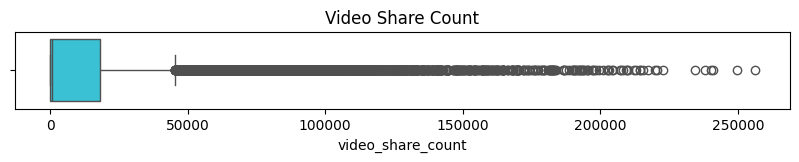

In [16]:
# Boxplot to visualize distribution of `video_share_count`
plt.figure(figsize=(10, 1))
sns.boxplot(x=df_cleaned['video_share_count'], color="#20D5EC")
plt.title('Video Share Count');

In [17]:
# Click to Unhide - Test Case Alternative Code
# Check for and handle outliers for video_share_count
if False:
    percentile25 = df_cleaned["video_share_count"].quantile(0.25)
    percentile75 = df_cleaned["video_share_count"].quantile(0.75)
    
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    
    df_cleaned.loc[df_cleaned["video_share_count"] > upper_limit, "video_share_count"] = upper_limit

***Note:*** 2508 outliers detected. Left as is.

<br>

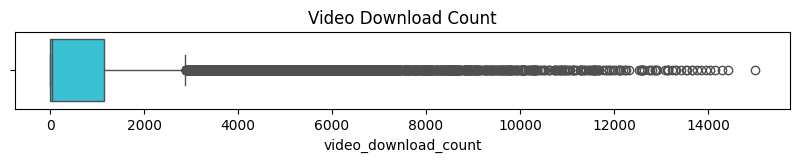

In [18]:
# Boxplot to visualize distribution of video_download_count
plt.figure(figsize=(10, 1))
sns.boxplot(x=df_cleaned['video_download_count'], color="#20D5EC")
plt.title('Video Download Count');

In [19]:
# Click to Unhide - Test Case Alternative Code
# Check for and handle outliers for 'video_download_count'
if False:
    percentile25 = df_cleaned["video_download_count"].quantile(0.25)
    percentile75 = df_cleaned["video_download_count"].quantile(0.75)
    
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    
    df_cleaned.loc[df_cleaned["video_download_count"] > upper_limit, "video_download_count"] = upper_limit

***Note:*** 2450 outliers detected. Left as is.

<br>

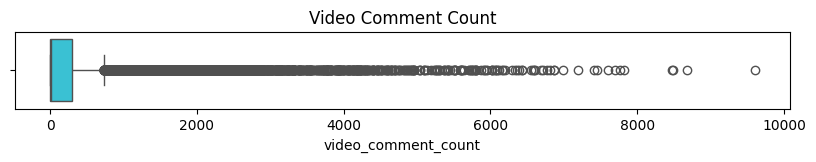

In [20]:
# Boxplot to visualize distribution of `video_comment_count`
plt.figure(figsize=(10, 1))
sns.boxplot(x=df_cleaned['video_comment_count'], color="#20D5EC")
plt.title('Video Comment Count');

In [21]:
# Capping upper outliers using the IQR method for 'video_comment_count'
percentile25 = df_cleaned["video_comment_count"].quantile(0.25)
percentile75 = df_cleaned["video_comment_count"].quantile(0.75)

iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr

df_cleaned.loc[df_cleaned["video_comment_count"] > upper_limit, "video_comment_count"] = upper_limit

***Note:*** 2789 outliers detected (the highest number of outliers). Capped outliers at upper limit.

<br>

In [22]:
# Confirm Outlier Changes
outlier_df = calculate_outliers(df_cleaned, column_list)
outlier_df

,Column,Total Counts,Upper Outliers,Lower Outliers,Total Outliers,Proportion
0,video_duration_sec,6.187760e+05,0,0,0,0.00%
1,video_view_count,4.860858e+09,0,0,0,0.00%
2,video_like_count,1.418390e+09,0,0,0,0.00%
3,video_share_count,3.193755e+08,2508,0,2508,13.14%
4,video_download_count,2.002732e+07,2450,0,2450,12.84%
5,video_comment_count,3.454652e+06,0,0,0,0.00%


***Note:*** I've chosen to cap only the metrics with the most extreme outliers at their upper limits. This selective capping has demonstrated in previous drafts that it minimizes VIF scores, supporting a robust model that balances interpretability and predictive power, with reduced trade-offs from multicollinearity.

<br>

## **6. Confirm Data Teams Observation**

In [23]:
# Calculate counts of 'claim_status' within each 'verified_status' group
counts = df_cleaned.groupby('verified_status')['claim_status'].value_counts(dropna=False)
proportion = (counts / counts.sum() * 100).round(2)
observation_df = pd.DataFrame({
    'Count' : counts,
    'Proportion' : proportion.round(2).astype(str) + '%'
})
observation_df

Count Proportion
verified_status claim_status                  
not verified    claim          9399     49.25%
                opinion        8485     44.46%
verified        opinion         991      5.19%
                claim           209       1.1%

***Note:*** The data team's observation that `'verified'` users are more likely to post opinion-based content has been validated.

<br>

## **7. Begin Model Assessment and Preparation**

#### **Assess Class Imbalance**

**Prepare** data for modelling by ensuring balanced classes.

In [24]:
# Check class balance
values = df_cleaned['verified_status'].value_counts(dropna=False)
distribution = (values / values.sum() * 100).round(2)
balance_df = pd.DataFrame({
    'Count' : values,
    'Distribution' : distribution.round(2).astype(str) + '%'
})
balance_df

,Count,Distribution
verified_status,,
not verified,17884,93.71%
verified,1200,6.29%


***Insight:*** 

* The dataset shows a significant class imbalance, with verified accounts comprising only 6.29% of the data. To address this, I will apply resampling techniques to create a more balanced representation of the outcome variable in the model.

<br>

**Balance** dataset.

In [25]:
# Identify data points from majority and minority classes
data_majority = df_cleaned[df_cleaned["verified_status"] == "not verified"]
data_minority = df_cleaned[df_cleaned["verified_status"] == "verified"]

# Upsample the minority class (which is "verified")
data_minority_upsampled = resample(data_minority,
                                 replace=True,                 # to sample with replacement
                                 n_samples=len(data_majority), # to match majority class
                                 random_state=0)               # to create reproducible results

# Combine majority class with upsampled minority class
data_upsampled = pd.concat([data_majority, data_minority_upsampled]).reset_index(drop=True)

# Display new class counts
data_upsampled["verified_status"].value_counts()

verified_status
not verified    17884
verified        17884
Name: count, dtype: int64

<br>

## **8. Feature Engineering**

**Calculate** the length of each `'video_transcription_text'` and add it as a new column in the dataframe, making it available as a potential feature for the model.

In [26]:
# Get the average `video_transcription_text` length for verified and the average `video_transcription_text` length for not verified
data_upsampled['text_length'] = data_upsampled['video_transcription_text'].str.len()
average_lengths = data_upsampled.groupby('verified_status')['text_length'].mean().reset_index()
average_lengths

,verified_status,text_length
0,not verified,89.401141
1,verified,84.569559


In [27]:
# Get the average `video_transcription_text` length for claims and the average `video_transcription_text` length for opinions
average_claims_lengths = data_upsampled.groupby('claim_status')['text_length'].mean().reset_index()
average_claims_lengths

,claim_status,text_length
0,claim,95.200032
1,opinion,82.570643


***Insight:*** 

* Both `'not verified'` and `'claims'` contain the longest average text length within their respective groups.

<br>

In [28]:
# Display first few rows of dataframe after adding new column
data_upsampled.head(3)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137


<br>

**Visualize** the distribution of `'video_transcription_text'` lengths using newly created `'text_length'` column for videos posted by verified and unverified accounts.

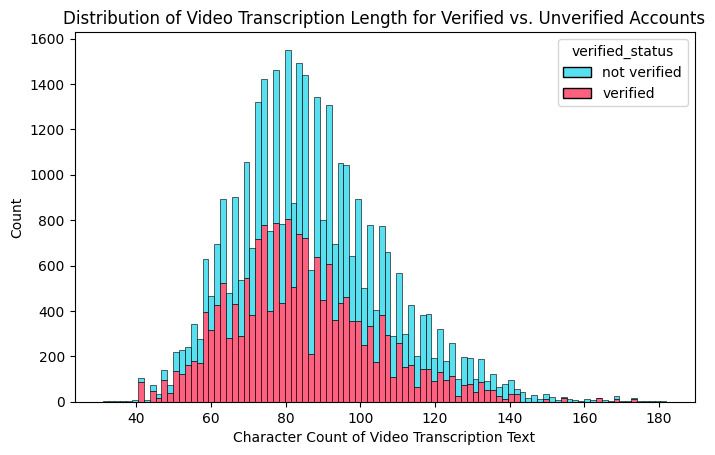

In [29]:
# Plot histograms for verified and unverified accounts
plt.figure(figsize=(8,4.8))
tiktok_colours = ["#20D5EC", "#FE2C55"]
sns.histplot(data=data_upsampled, stat="count", multiple="stack", x="text_length", kde=False, palette=tiktok_colours, 
             hue="verified_status", element="bars", legend=True)
plt.title("Seaborn Stacked Histogram")
plt.xlabel("Character Count of Video Transcription Text")
plt.ylabel("Count")
plt.title("Distribution of Video Transcription Length for Verified vs. Unverified Accounts")
plt.show()

<br>

## **9. Examine Correlations**

Visualize feature correlations to identify highly correlated metrics.

**Create** a correlation matrix.

In [30]:
# Correlation matrix to help determine most correlated variables
data_upsampled.corr(numeric_only = True)

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
#,1.000000,-0.000853,-0.011729,-0.697007,-0.626385,-0.504015,-0.487096,-0.608773,-0.193677
video_id,-0.000853,1.000000,0.011859,0.002554,0.005993,0.010515,0.008753,0.012674,-0.007083
video_duration_sec,-0.011729,0.011859,1.000000,0.013589,0.004494,0.002206,0.003989,-0.001086,-0.002981
video_view_count,-0.697007,0.002554,0.013589,1.000000,0.856937,0.711313,0.690048,0.748361,0.244693
video_like_count,-0.626385,0.005993,0.004494,0.856937,1.000000,0.832146,0.805543,0.818032,0.216693
video_share_count,-0.504015,0.010515,0.002206,0.711313,0.832146,1.000000,0.710117,0.671335,0.171651
video_download_count,-0.487096,0.008753,0.003989,0.690048,0.805543,0.710117,1.000000,0.793668,0.173396
video_comment_count,-0.608773,0.012674,-0.001086,0.748361,0.818032,0.671335,0.793668,1.000000,0.217661
text_length,-0.193677,-0.007083,-0.002981,0.244693,0.216693,0.171651,0.173396,0.217661,1.000000


<br>

**Visualize** a correlation heatmap of the data.

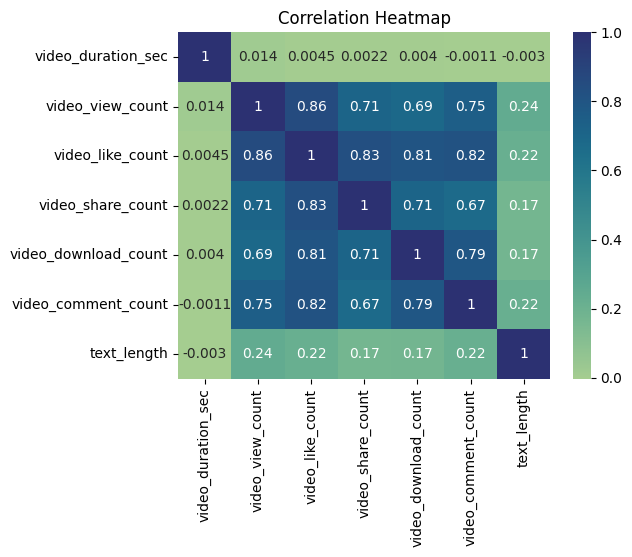

In [31]:
# Plot Heatmap
plt.figure(figsize = (6, 4.5))
sns.heatmap(
    data_upsampled[["video_duration_sec", "claim_status", "author_ban_status", "video_view_count", 
                    "video_like_count", "video_share_count", "video_download_count", "video_comment_count", "text_length"]]
    .corr(numeric_only=True), 
    annot = True, 
    cmap = "crest")

plt.title("Correlation Heatmap")
plt.show()

***Insight:*** 

* `'video_like_count'` has the highest correlation score across the highly correlated features.

<br>

**Calculate** the averages of highly correlated features to assess pairwise correlation strength.

In [32]:
print(f"video_view_count     | {(0.86+0.71+0.69+0.75)/4}")
print(f"video_like_count     | {(0.86+0.83+0.81+0.82)/4}")
print(f"video_share_count    | {(0.71+0.83+0.71+0.67)/4}")
print(f"video_download_count | {(0.69+0.81+0.71+0.79)/4}")
print(f"video_comment_count  | {(0.75+0.82+0.67+0.79)/4}")

video_view_count     | 0.7525
video_like_count     | 0.83
video_share_count    | 0.73
video_download_count | 0.75
video_comment_count  | 0.7575


***Inights:***

* Minimal correlation from `'video_duration_sec'` and `'text_length'` features.
* `'video_like_count'` contains highest average correlation score.

<br>

#### **Check for Multicollinearity**

**After** viewing the correlation heatmap, checking for multicollinearity is essential because the heatmap only provides a visual sense of pairwise correlations between features. However, multicollinearity involves complex interactions where a single feature may be highly correlated with a combination of multiple other features, which isn’t fully captured in a heatmap.

**Calculate** VIF scores.

In [33]:
# Select only the numerical columns you want to check for multicollinearity
X_vif = data_upsampled[['video_view_count', 'video_like_count', 'video_share_count', 
                        'video_download_count', 'video_comment_count']]

# Add a constant column to X_vif for VIF calculation
X_vif = sm.add_constant(X_vif)

# Calculate VIF for each feature
vif_data = pd.DataFrame({
    "Feature": X_vif.columns,
    "VIF": [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
})

# Drop the constant column from the results
vif_data = vif_data[vif_data['Feature'] != 'const']

vif_data

,Feature,VIF
1,video_view_count,3.882412
2,video_like_count,8.098610
3,video_share_count,3.324211
4,video_download_count,3.465061
5,video_comment_count,3.721522


***Insights:*** 

* As noted in the data cleaning stage, selectively capping metrics with the fewest and most extreme outliers in this instance helped keep VIF scores relatively low, with the exception of `'video_like_count'`.
* `'video_like_count'` has a high VIF score (8.1) and the strongest average correlation (0.83) with other features, indicating significant pairwise correlation and multicollinearity. To improve model stability and interpretability, this metric will be excluded from the model.

<br>

# **Construct Phase:**

## **10. Variable Selection**

**Define** the target variable (Y) and predictor variables (X) for the model.

In [34]:
# Select outcome variable
y = data_upsampled['verified_status']

In [35]:
# Click to Unhide - Test Case Variable Selection
# Includes 'video_like_count'
if False:
    # Select features
    X = data_upsampled[['claim_status', 'video_duration_sec', 'author_ban_status', 'video_view_count', 
                        'video_like_count', 'video_share_count', 'video_download_count', 'video_comment_count']]
    
    # Display first few rows of features dataframe
    X.head()

In [36]:
# Select features
X = data_upsampled[['claim_status', 'video_duration_sec', 'author_ban_status', 'video_view_count', 
                    'video_share_count', 'video_download_count', 'video_comment_count']]

# Display first few rows of features dataframe
X.head()

,claim_status,video_duration_sec,author_ban_status,video_view_count,video_share_count,video_download_count,video_comment_count
0,claim,59,under review,343296.0,241.0,1.0,0.0
1,claim,32,active,140877.0,19034.0,1161.0,684.0
2,claim,31,active,902185.0,2858.0,833.0,329.0
3,claim,25,active,437506.0,34812.0,1234.0,584.0
4,claim,19,active,56167.0,4110.0,547.0,152.0


***Note:*** The columns `'#'` and `'video_id'` have been excluded as they do not contribute value to the model. Additionally, `'video_like_count'` has been omitted due to its strong correlation with other features, as mentioned earlier. This decision aligns with the logistic regression assumption of no multicollinearity, which must be satisfied.

<br>

## **11. Train-test split**

**Split** the dataset to assess model performance on unseen data.

In [37]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [38]:
# Get shape of each training and testing set
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((25037, 7), (10731, 7), (25037,), (10731,))

**Note:** Number of training and testing rows and features both align.

<br>

## **12. Encode variables**

**Transform** categorical features into a format suitable for the model.  First inspect the `'X_train'` data types.

In [39]:
# Check data types
X_train.dtypes

claim_status             object
video_duration_sec        int64
author_ban_status        object
video_view_count        float64
video_share_count       float64
video_download_count    float64
video_comment_count     float64
dtype: object

In [40]:
# Get unique values in `claim_status`
X_train['claim_status'].unique()

array(['claim', 'opinion'], dtype=object)

In [41]:
# Get unique values in `author_ban_status`
X_train['author_ban_status'].unique()

array(['active', 'under review', 'banned'], dtype=object)

**Note:** To prepare for model implementation using sklearn, the `'claim_status'` and `'author_ban_status features'`, currently of type object, must be converted to numeric format. Use one-hot encoding or another suitable method to encode these categorical features in the training set.

<br>

**Encode** `'X-train'` features using one-hot encoding.

In [42]:
# Select the training features that needs to be encoded
features_to_encode = X_train[["claim_status", "author_ban_status"]]

# Display first few rows
features_to_encode.head()

,claim_status,author_ban_status
32925,claim,active
4266,claim,active
24979,opinion,active
24074,opinion,active
32056,opinion,active


In [43]:
# Set up an encoder for one-hot encoding the categorical features
X_encoder = OneHotEncoder(drop='first', sparse_output=False)

In [44]:
# Fit and transform the training features using the encoder
X_train_encoded = X_encoder.fit_transform(features_to_encode)

In [45]:
# Get feature names from encoder
X_encoder.get_feature_names_out()

array(['claim_status_opinion', 'author_ban_status_banned',
       'author_ban_status_under review'], dtype=object)

In [46]:
# Display first few rows of encoded training features
X_train_encoded

array([[0., 0., 0.],
       [0., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [47]:
# Place encoded training features (which is currently an array) into a dataframe
X_train_encoded_df = pd.DataFrame(
    data = X_train_encoded, 
    columns = X_encoder.get_feature_names_out())

# Display first few rows
X_train_encoded_df.head()

,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [48]:
# Display the first few rows of `X_train` after dropping the `claim_status` and `author_ban_status` columns
# since these features are being transformed into numeric format
X_train.drop(columns = ["claim_status", "author_ban_status"]).head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count
32925,52,599928.0,13752.0,3211.0,728.5
4266,25,623816.0,59817.0,4177.0,728.5
24979,44,6575.0,9.0,0.0,0.0
24074,30,389.0,40.0,3.0,1.0
32056,9,4244.0,94.0,40.0,14.0


In [49]:
# Concatenate `X_train` and `X_train_encoded_df` to create the final training dataframe (`X_train_final`)
# Note: `.reset_index(drop=True)` is used to reset the index in `X_train` after dropping `claim_status` 
# and `author_ban_status`, ensuring alignment with the indices in `X_train_encoded_df` and `count_df`.

X_train_final = pd.concat([X_train.drop(columns = ["claim_status", "author_ban_status"]).reset_index(drop=True),
                           X_train_encoded_df], axis = 1)

# Display first few rows
X_train_final.head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,52,599928.0,13752.0,3211.0,728.5,0.0,0.0,0.0
1,25,623816.0,59817.0,4177.0,728.5,0.0,0.0,0.0
2,44,6575.0,9.0,0.0,0.0,1.0,0.0,0.0
3,30,389.0,40.0,3.0,1.0,1.0,0.0,0.0
4,9,4244.0,94.0,40.0,14.0,1.0,0.0,0.0



<br>

## **13. Encode Outcome Variable**

**Check** `'y_train'` unique values and data type.

In [50]:
# Get unique values of outcome variable
y_train.unique()

array(['verified', 'not verified'], dtype=object)



<br>

**Encode** `'y-train'` features using one-hot encoding.

In [51]:
# Set up an encoder for one-hot encoding the categorical outcome variable
y_encoder = OneHotEncoder(drop='first', sparse_output=False)

In [52]:
# Encode the training outcome variable (`y_train`):
# - Adjust the shape of `y_train` to a 2D array before passing it into `.fit_transform()`.
# - Use `.ravel()` to flatten the resulting array from `.fit_transform()` for compatibility when training the model.

y_train_final = y_encoder.fit_transform(y_train.values.reshape(-1, 1)).ravel()

# Display the encoded training outcome variable
y_train_final

array([1., 0., 1., ..., 1., 1., 0.])

<br>

## **14. Model building**

**Construct** and fit the logistic regression model to the training data.

In [53]:
# Construct a logistic regression model and fit it to the training set
# Scale the features
# Assuming X_test needs to match the processed columns in X_train_final
log_clf = LogisticRegression(random_state=0, max_iter=1000).fit(X_train_final, y_train_final)

In [54]:
# Click to Unhide - Test Case Alternative Code
# Includes solver='liblinear' parameter
if False:
    # Construct a logistic regression model and fit it to the training set
    # Scale the features
    # Assuming X_test needs to match the processed columns in X_train_final
    log_clf = LogisticRegression(random_state=0, max_iter=800, solver='liblinear').fit(X_train_final, y_train_final)

<br>

# **Execute Phase:**

## **15. Results and evaluation**

**Prepare** the test set, make predictions, and evaluate the model’s performance.

**Encode** `'X_test'` categorical features using the same encoding method applied to the training set.

In [55]:
# Select the testing features that needs to be encoded
X_test_to_encode = X_test[["claim_status", "author_ban_status"]]

# Display first few rows
X_test_to_encode.head()

,claim_status,author_ban_status
21061,opinion,active
31748,opinion,active
20197,claim,active
5727,claim,active
11607,opinion,active


In [56]:
# Transform the testing features using the encoder
X_test_encoded = X_encoder.transform(X_test_to_encode)

# Display first few rows of encoded testing features
X_test_encoded

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [57]:
# Place encoded testing features (which is currently an array) into a dataframe
X_test_encoded_df = pd.DataFrame(data = X_test_encoded, 
                                 columns = X_encoder.get_feature_names_out())

# Display first few rows
X_test_encoded_df.head()

,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,1.0,0.0,0.0


In [58]:
# Display the first few rows of `X_test` after dropping the `claim_status` and `author_ban_status` columns
# since these features are being transformed into numeric format
X_test.drop(columns = ["claim_status", "author_ban_status"]).head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count
21061,41,2118.0,57.0,5.0,2.0
31748,27,5701.0,157.0,1.0,0.0
20197,31,449767.0,75385.0,5956.0,728.5
5727,19,792813.0,56597.0,5146.0,728.5
11607,54,2044.0,68.0,19.0,2.0


In [59]:
# Concatenate `X_test` and `X_test_encoded_df` to create the final testing dataframe (`X_test_final`):
# - Use `.reset_index(drop=True)` to reset the index in `X_test` after dropping `claim_status` and `author_ban_status`.
# - This ensures alignment with the indices in `X_test_encoded_df` and `test_count_df`.

X_test_final = pd.concat([X_test.drop(columns = ["claim_status", "author_ban_status"]).reset_index(drop=True), 
                          X_test_encoded_df], axis=1)

# Display first few rows
X_test_final.head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,41,2118.0,57.0,5.0,2.0,1.0,0.0,0.0
1,27,5701.0,157.0,1.0,0.0,1.0,0.0,0.0
2,31,449767.0,75385.0,5956.0,728.5,0.0,0.0,0.0
3,19,792813.0,56597.0,5146.0,728.5,0.0,0.0,0.0
4,54,2044.0,68.0,19.0,2.0,1.0,0.0,0.0


<br>

**Test** the logistic regression model. Use the model to make predictions on the encoded testing set.

In [60]:
# Use the logistic regression model to get predictions on the encoded testing set
y_pred = log_clf.predict(X_test_final)

<br>

**Display** the predictions on the encoded testing set.

In [61]:
# Display the predictions on the encoded testing set
y_pred

array([1., 1., 0., ..., 1., 1., 1.])

<br>

**Display** the true labels of the testing set.

In [62]:
# Display the true labels of the testing set
y_test.head()

21061        verified
31748        verified
20197        verified
5727     not verified
11607    not verified
Name: verified_status, dtype: object

<br>

**Encode** the true labels of the testing set so it can be compared to the predictions.

In [63]:
# Encode the testing outcome variable (`y_test`):
# - Adjust the shape of `y_test` to a 2D array before passing it into `.transform()`.
# - Use `.ravel()` to flatten the resulting array from `.transform()` for compatibility when comparing with predictions.

y_test_final = y_encoder.transform(y_test.values.reshape(-1, 1)).ravel()

# Display the encoded testing outcome variable
y_test_final

array([1., 1., 1., ..., 0., 1., 1.])

<br>

**Ensure** that the dimensions of the training and testing sets are correctly aligned, especially after adding new features.

In [64]:
# Get shape of each training and testing set
X_train_final.shape, y_train_final.shape, X_test_final.shape, y_test_final.shape

((25037, 8), (25037,), (10731, 8), (10731,))

**Note:** Number of training and testing rows and features both align.

<br>

## **16. Visualize model results**

Evaluate the model’s performance using key metrics.

**Generate** and display a confusion matrix to visualize the model’s classification performance.

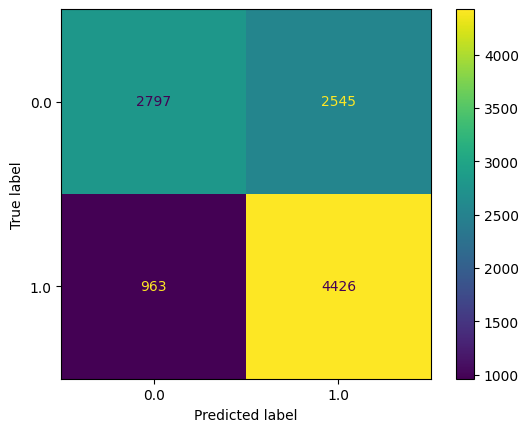

In [65]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test_final, y_pred, labels=log_clf.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=log_clf.classes_)

# Plot confusion matrix
log_disp.plot()

# Display plot
plt.show()

***Insights:***

**Test size set to 0.25 - Trial**

| Quadrant       |Count |Proportion|Description|
|----------------|------|--------|-------------------------------------------------------------------------------------------------------|
|True Negatives  | 2326 | 26.01% | The number of videos posted by unverified accounts that the model correctly classified as unverified. |
|False Positives | 2133 | 23.85% | The number of videos posted by unverified accounts that the model incorrectly classified as verified. |
|False Negatives | 815  | 9.11%  | The number of videos posted by verified accounts that the model incorrectly classified as unverified. |
|True Positives  | 3668 | 41.02% | The number of videos posted by verified accounts that the model correctly classified as verified.     |

**Test size set to 0.30 - Final**

| Quadrant       |Count |Proportion|Description|
|----------------|------|--------|-------------------------------------------------------------------------------------------------------|
|True Negatives  | 2797 | 26.06% | The number of videos posted by unverified accounts that the model correctly classified as unverified. |
|False Positives | 2545 | 23.71% | The number of videos posted by unverified accounts that the model incorrectly classified as verified. |
|False Negatives | 963  | 8.97%  | The number of videos posted by verified accounts that the model incorrectly classified as unverified. |
|True Positives  | 4426 | 41.24% | The number of videos posted by verified accounts that the model correctly classified as verified.     |

<br>

* An ideal model would classify all instances correctly, resulting in only true positives and true negatives, with zero false positives or false negatives. However, this model shows 23.71% false positives and 8.97% false negatives.
* Increasing the test size from 25% to 30% resulted in a slight improvement in both correct and incorrect predictions, while leaving the classification report unchanged.
* While selective capping of outliers improved the VIF scores, reducing multicollinearity among features, the overall performance of the logistic regression model remains subpar. This suggests that addressing multicollinearity alone is insufficient to achieve a strong predictive model, indicating a need to explore alternative methods or additional features.

<br>

**Create** a classification report that includes precision, recall, f1-score, and accuracy to provide a comprehensive evaluation of the model.

In [66]:
# Create a classification report
target_labels = ["verified", "not verified"]
print(classification_report(y_test_final, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

    verified       0.74      0.52      0.61      5342
not verified       0.63      0.82      0.72      5389

    accuracy                           0.67     10731
   macro avg       0.69      0.67      0.67     10731
weighted avg       0.69      0.67      0.67     10731



***Insights:***

* The model achieved a precision of 74% and a recall of 52% for the `'verified'` class, indicating that while the model correctly identifies a high proportion of true 'verified' cases among all 'verified' predictions, it misses many actual 'verified' cases.
* The `'not verified'` class, which is the target class, achieved a precision of 63% and a recall of 82%, meaning the model performs better at identifying 'not_verified' cases but at the cost of increased false positives.
* Overall scores were
```
Weighted Precision Avg | 69%
Weighted Recall Avg    | 67%
Accuracy               | 67%
```

<Br>

## **17. Interpret model coefficients**

**Interpret** the coefficients from the logistic regression model to understand the influence of each feature.

In [67]:
# Get the feature names from the model and the model coefficients (which represent log-odds ratios)
# Place into a DataFrame for readability
pd.DataFrame(data={"Feature Name":log_clf.feature_names_in_, "Model Coefficient":log_clf.coef_[0]})

,Feature Name,Model Coefficient
0,video_duration_sec,-2.315862e-03
1,video_view_count,-2.127551e-07
2,video_share_count,5.034573e-06
3,video_download_count,-8.290600e-05
4,video_comment_count,4.470291e-04
5,claim_status_opinion,1.684831e+00
6,author_ban_status_banned,-4.169508e-01
7,author_ban_status_under review,-6.872788e-02


***Inisghts:***

* The coefficients indicate weak relationships between the features and the outcome, with log odds ratios close to zero for most variables.
    * This implies limited predictive power of the features in this specific dataset.
* Several features, such as `'video_druation_sec'`, exhibit negative relationships with the outcome. A negative coefficient implies that as the feature value increases, the log-odds of the video being `'not verified'` decrease.
    * For example, a one-unit increase in `'video_duration_sec'` corresponds to a 0.0023 decrease in the log-odds of the video being `'not verified'`, which translates into slightly lower odds of this outcome.

<br>

# **Conclusion**

This analysis was exploratory in nature, aiming to understand how various factors are associated with user verification status on TikTok. While the logistic regression model provided initial insights, the results indicate that the model has limited predictive power and overall performance.

**Key Findings Include:**

* A significant class imbalance in the dataset, with verified accounts representing only 6.29%, required resampling techniques to address this issue.
* Multicollinearity posed a challenge, particularly with the `'video_like_count'` feature, which had a high VIF score (over 8) and strong average correlation with other metrics. Excluding this feature helped improve model stability and align with the logistic regression assumption of no multicollinearity.
* Despite efforts to address multicollinearity and outliers, the model’s accuracy remained subpar, with an overall accuracy of 67% and weighted precision and recall averages at 69% and 67%, respectively.

**Perfomance Insights:**

* The model achieved better performance for the `'not verified'` class (precision: 63%, recall: 82%) than for the `'verified'` class (precision: 74%, recall: 52%). However, this came at the cost of increased false positives (23.71%) and false negatives (8.97%).
* The weak relationships between features and the outcome, as indicated by log-odds ratios close to zero for most variables, further limited the model’s predictive power.

This exploration aligns with the lab’s goal of examining how different video characteristics are associated with verification status. While the model itself is not robust enough for practical use, it has provided valuable insights into the relationships between features and verified status. These findings may help inform future models for classifying user submissions as claims or opinions. Ultimately, this stage served as an essential step in exploring relationships rather than building a final predictive solution.